<a href="https://colab.research.google.com/github/kdemertzis/MSc-Bio/blob/main/Stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Υπολογισμός Περιγραφικής Στατιστικής**
Ξεκινήστε εισάγοντας όλα τα πακέτα που θα χρειαστείτε:

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

Αυτά είναι όλα τα πακέτα που θα χρειαστείτε για υπολογισμούς στατιστικών στοιχείων Python. Συνήθως, δεν θα χρησιμοποιήσετε το ενσωματωμένο math πακέτο της Python, αλλά θα είναι χρήσιμο σε αυτό το σεμινάριο. Αργότερα, θα κάνετε εισαγωγή matplotlib.pyplot για οπτικοποίηση δεδομένων.

Ας δημιουργήσουμε κάποια δεδομένα για να εργαστούμε. Θα ξεκινήσετε με λίστες Python που περιέχουν ορισμένα αυθαίρετα αριθμητικά δεδομένα:

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
x

x_with_nan


[8.0, 1, 2.5, nan, 4, 28.0]

Τώρα έχετε τις λίστες xκαι x_with_nan. Είναι σχεδόν τα ίδια, με τη διαφορά που x_with_nan περιέχει μια nanτιμή. Είναι σημαντικό να κατανοήσετε τη συμπεριφορά των ρουτινών στατιστικών Python όταν συναντούν μια μη-αριθμητική τιμή (nan). Στην επιστήμη δεδομένων, οι τιμές που λείπουν είναι συχνές και συχνά θα τις αντικαταστήσετε με nan.

**Σημείωση:** Πώς παίρνετε μια nan τιμή;

Στην Python, μπορείτε να χρησιμοποιήσετε οποιοδήποτε από τα παρακάτω:

float('nan')
math.nan
np.nan
Μπορείτε να χρησιμοποιήσετε όλες αυτές τις λειτουργίες εναλλακτικά:

```
math.isnan(np.nan), np.isnan(math.nan)
math.isnan(y_with_nan[3]), np.isnan(y_with_nan[3])

```
Μπορείτε να δείτε ότι όλες οι συναρτήσεις είναι ισοδύναμες. Ωστόσο, έχετε υπόψη σας ότι η σύγκριση δύο nanτιμών για την ισότητα αποδίδει False. Με άλλα λόγια, math.nan == math.nanείναι False!

Τώρα, δημιουργήστε np.ndarray και pd.Series αντικείμενα που αντιστοιχούν σε x και x_with_nan:

In [4]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
y

y_with_nan
z

z_with_nan

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64

Τώρα έχετε δύο πίνακες NumPy (y και y_with_nan) και δύο Panda Series (z και z_with_nan). Όλα αυτά είναι 1D ακολουθίες τιμών.

**Σημείωση:** Παρόλο που θα χρησιμοποιείτε λίστες, έχετε υπόψη σας ότι, στις περισσότερες περιπτώσεις, μπορείτε να χρησιμοποιήσετε πλειάδες με τον ίδιο τρόπο.

Μπορείτε προαιρετικά να καθορίσετε μια ετικέτα για κάθε τιμή στο z και z_with_nan.

# **Μέτρα Κεντρικής Τάσης**
Οι μετρήσεις της κεντρικής τάσης δείχνουν τις κεντρικές ή μεσαίες τιμές των συνόλων δεδομένων. Υπάρχουν διάφοροι ορισμοί για το τι θεωρείται το κέντρο ενός συνόλου δεδομένων. Σε αυτό το σεμινάριο, θα μάθετε πώς να προσδιορίζετε και να υπολογίζετε αυτές τις μετρήσεις κεντρικής τάσης:

Mean
Weighted mean
Geometric mean
Harmonic mean
Median
Mode

**Mean**
Ο μέσος όρος του δείγματος, που ονομάζεται επίσης αριθμητικός μέσος όρος δείγματος ή απλά ο μέσος όρος, είναι ο αριθμητικός μέσος όρος όλων των στοιχείων σε ένα σύνολο δεδομένων. Ο μέσος όρος ενός συνόλου δεδομένων 𝑥 εκφράζεται μαθηματικά ως Σᵢ𝑥ᵢ/𝑛, όπου 𝑖 = 1, 2, …, 𝑛. Με άλλα λόγια, είναι το άθροισμα όλων των στοιχείων 𝑥ᵢ διαιρεμένο με τον αριθμό των στοιχείων στο σύνολο δεδομένων 𝑥.

Αυτό το σχήμα απεικονίζει τον μέσο όρο ενός δείγματος με πέντε σημεία δεδομένων:
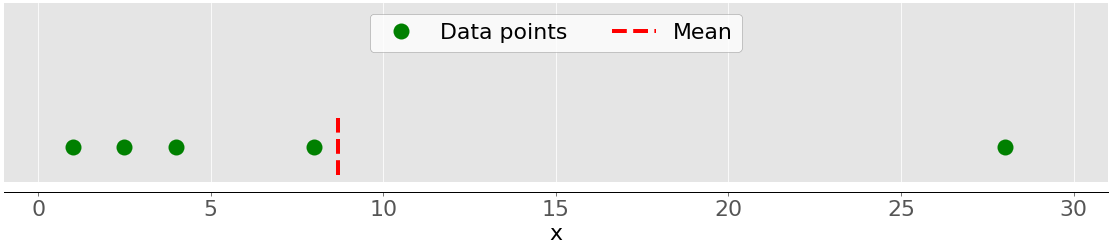

Οι πράσινες κουκκίδες αντιπροσωπεύουν τα σημεία δεδομένων 1, 2,5, 4, 8 και 28. Η κόκκινη διακεκομμένη γραμμή είναι ο μέσος όρος τους ή (1 + 2,5 + 4 + 8 + 28) / 5 = 8,7.

Μπορείτε να υπολογίσετε τη μέση τιμή με καθαρή Python χρησιμοποιώντας sum() και len(), χωρίς εισαγωγή βιβλιοθηκών:

In [ ]:
mean_ = sum(x) / len(x)
mean_

Αν και αυτό είναι καθαρό και κομψό, μπορείτε επίσης να εφαρμόσετε ενσωματωμένες συναρτήσεις στατιστικών στοιχείων Python:

In [5]:
mean_ = statistics.mean(x)
mean_

mean_ = statistics.fmean(x)
mean_

8.7

Έχετε καλέσει τις συναρτήσεις mean() και fmean() από την ενσωματωμένη statistics βιβλιοθήκη Python και πήρατε το ίδιο αποτέλεσμα με την καθαρή Python. fmean() εισάγεται στην Python 3.8 ως ταχύτερη εναλλακτική του mean(). Επιστρέφει πάντα έναν αριθμό κινητής υποδιαστολής.

Ωστόσο, εάν υπάρχουν nanτιμές μεταξύ των δεδομένων σας, τότε statistics.mean()και statistics.fmean() θα επιστρέψει nan ως έξοδος:

In [6]:
mean_ = statistics.mean(x_with_nan)
mean_

mean_ = statistics.fmean(x_with_nan)
mean_

nan

Αυτό το αποτέλεσμα είναι συνεπές με τη συμπεριφορά του sum(), επειδή sum(x_with_nan) επίσης επιστρέφει nan.

Εάν χρησιμοποιείτε το NumPy, τότε μπορείτε να βρείτε τον μέσο όρο με np.mean():

In [7]:
mean_ = np.mean(y)
mean_

8.7

Στο παραπάνω παράδειγμα, mean() είναι μια συνάρτηση, αλλά μπορείτε να χρησιμοποιήσετε και την αντίστοιχη μέθοδο .mean():

In [8]:
mean_ = y.mean()
mean_

8.7

Η συνάρτηση mean() και η μέθοδος .mean() από το NumPy επιστρέφουν το ίδιο αποτέλεσμα με το statistics.mean(). Αυτό συμβαίνει επίσης όταν υπάρχουν nanτιμές μεταξύ των δεδομένων σας:

In [9]:
np.mean(y_with_nan)

y_with_nan.mean()

nan

Συχνά δεν χρειάζεται να αποκτήσετε μια nan αξία ως αποτέλεσμα. Εάν προτιμάτε να αγνοήσετε nan τιμές, τότε μπορείτε να χρησιμοποιήσετε np.nanmean():

In [10]:
np.nanmean(y_with_nan)

8.7

nanmean() απλά αγνοεί όλες τις nan αξίες. Επιστρέφει την ίδια τιμή σαν mean() να την εφαρμόσατε στο σύνολο δεδομένων χωρίς τις nan τιμές.

pd.Series Τα αντικείμενα έχουν επίσης τη μέθοδο .mean():

In [11]:
mean_ = z.mean()
mean_

8.7

Όπως μπορείτε να δείτε, χρησιμοποιείται παρόμοια όπως στην περίπτωση του NumPy. Ωστόσο, .mean() από το Pandas αγνοεί τις nan τιμές από προεπιλογή:

In [12]:
z_with_nan.mean()

8.7

Αυτή η συμπεριφορά είναι το αποτέλεσμα της προεπιλεγμένης τιμής της προαιρετικής παραμέτρου skipna. Μπορείτε να αλλάξετε αυτήν την παράμετρο για να τροποποιήσετε τη συμπεριφορά.

# **Σταθμισμένος Μέσος**
Ο σταθμισμένος μέσος όρος, που ονομάζεται επίσης σταθμισμένος αριθμητικός μέσος όρος ή σταθμισμένος μέσος όρος, είναι μια γενίκευση του αριθμητικού μέσου όρου που σας δίνει τη δυνατότητα να ορίσετε τη σχετική συμβολή κάθε σημείου δεδομένων στο αποτέλεσμα.

Ορίζετε ένα βάρος 𝑤ᵢ για κάθε σημείο δεδομένων 𝑥ᵢ του συνόλου δεδομένων 𝑥, όπου 𝑖 = 1, 2, …, 𝑛 και 𝑛 είναι ο αριθμός των στοιχείων στο 𝑥. Στη συνέχεια, πολλαπλασιάζετε κάθε σημείο δεδομένων με το αντίστοιχο βάρος, αθροίζετε όλα τα γινόμενα και διαιρείτε το άθροισμα που προκύπτει με το άθροισμα των βαρών: Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.

Σημείωση: Είναι βολικό (και συνήθως συμβαίνει) όλα τα βάρη να είναι μη αρνητικά, 𝑤ᵢ ≥ 0, και το άθροισμά τους να είναι ίσο με ένα ή Σᵢ𝑤ᵢ = 1.

Ο σταθμισμένος μέσος όρος είναι πολύ βολικός όταν χρειάζεστε τον μέσο όρο ενός συνόλου δεδομένων που περιέχει στοιχεία που εμφανίζονται με δεδομένες σχετικές συχνότητες. Για παράδειγμα, πείτε ότι έχετε ένα σύνολο στο οποίο το 20% όλων των στοιχείων είναι ίσο με 2, το 50% των στοιχείων είναι ίσο με 4 και το υπόλοιπο 30% των στοιχείων είναι ίσο με 8. Μπορείτε να υπολογίσετε τον μέσο όρο του ένα τέτοιο σετ όπως αυτό:

In [13]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

Εδώ, λαμβάνετε υπόψη τις συχνότητες με τα βάρη. Με αυτήν τη μέθοδο, δεν χρειάζεται να γνωρίζετε τον συνολικό αριθμό των αντικειμένων.

Μπορείτε να εφαρμόσετε τον σταθμισμένο μέσο όρο σε καθαρή Python συνδυάζοντας sum() με ένα range() ή με zip():

In [14]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
wmean

6.95

Και πάλι, αυτή είναι μια καθαρή και κομψή εφαρμογή όπου δεν χρειάζεται να εισάγετε βιβλιοθήκες.

Ωστόσο, εάν έχετε μεγάλα σύνολα δεδομένων, τότε το NumPy είναι πιθανό να παρέχει καλύτερη λύση. Μπορείτε να χρησιμοποιήσετε np.average() για να λάβετε τον σταθμισμένο μέσο όρο των συστοιχιών NumPy ή των Panda Series:

In [15]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
wmean

wmean = np.average(z, weights=w)
wmean


6.95

Το αποτέλεσμα είναι το ίδιο όπως στην περίπτωση της αμιγούς υλοποίησης Python. Μπορείτε επίσης να χρησιμοποιήσετε αυτήν τη μέθοδο σε συνηθισμένες λίστες και πλειάδες.

Μια άλλη λύση είναι να χρησιμοποιήσετε το προϊόν βάσει στοιχείων w * y με np.sum() ή .sum():

In [16]:
(w * y).sum() / w.sum()

6.95

Ωστόσο, να είστε προσεκτικοί εάν το σύνολο δεδομένων σας περιέχει nan τιμές:

In [17]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()

np.average(y_with_nan, weights=w)

np.average(z_with_nan, weights=w)


nan

Σε αυτήν την περίπτωση, average() επιστρέφει nan, το οποίο είναι συνεπές με το np.mean().

# **Αρμονικός Μέσος**
Ο αρμονικός μέσος όρος είναι ο αντίστροφος του μέσου όρου των αντίστροφων όλων των στοιχείων του συνόλου δεδομένων: 𝑛 / Σᵢ(1/𝑥ᵢ), όπου 𝑖 = 1, 2, …, 𝑛 και 𝑛 είναι ο αριθμός των στοιχείων στο σύνολο δεδομένων 𝑥. Μια παραλλαγή της καθαρής εφαρμογής Python του αρμονικού μέσου είναι η εξής:

In [18]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

Είναι αρκετά διαφορετικό από την τιμή του αριθμητικού μέσου όρου για τα ίδια δεδομένα x, που υπολογίσατε ότι είναι 8,7.

Μπορείτε επίσης να υπολογίσετε αυτό το μέτρο με statistics.harmonic_mean():

In [19]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

Το παραπάνω παράδειγμα δείχνει μία υλοποίηση του statistics.harmonic_mean(). Εάν έχετε μια nanτιμή σε ένα σύνολο δεδομένων, τότε θα επιστρέψει nan. Εάν υπάρχει τουλάχιστον ένα 0, τότε θα επιστρέψει 0. Εάν παρέχετε τουλάχιστον έναν αρνητικό αριθμό, τότε θα λάβετε statistics.StatisticsError:

In [20]:
statistics.harmonic_mean(x_with_nan)

statistics.harmonic_mean([1, 0, 2])

statistics.harmonic_mean([1, 2, -2])  # Raises StatisticsError

StatisticsError: ignored

Λάβετε υπόψη αυτά τα τρία σενάρια όταν χρησιμοποιείτε αυτήν τη μέθοδο!

Ένας τρίτος τρόπος για τον υπολογισμό του αρμονικού μέσου είναι να χρησιμοποιήσετε scipy.stats.hmean():

In [21]:
scipy.stats.hmean(y)

scipy.stats.hmean(z)

2.7613412228796843

Και πάλι, αυτή είναι μια αρκετά απλή εφαρμογή. Ωστόσο, εάν το σύνολο δεδομένων σας περιέχει nan, 0, έναν αρνητικό αριθμό ή οτιδήποτε άλλο εκτός από θετικούς αριθμούς, τότε θα λάβετε ένα ValueError!

# **Γεωμετρικός μέσος**
Ο γεωμετρικός μέσος όρος είναι η 𝑛-η ρίζα του γινομένου όλων των 𝑛 στοιχείων 𝑥ᵢ σε ένα σύνολο δεδομένων 𝑥: ⁿ√(Πᵢ𝑥ᵢ), όπου 𝑖 = 1, 2, …, 𝑛. Το παρακάτω σχήμα απεικονίζει τα αριθμητικά, αρμονικά και γεωμετρικά μέσα ενός συνόλου δεδομένων:
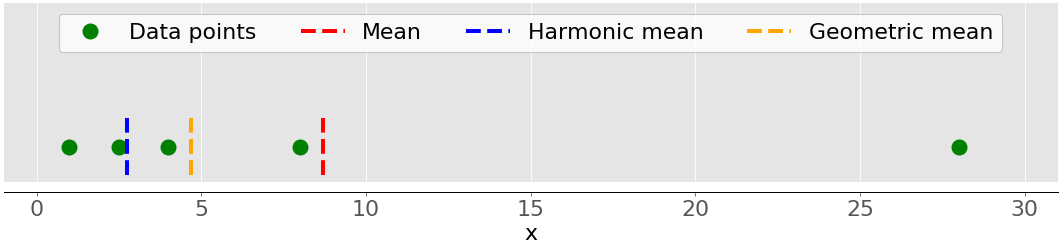
Και πάλι, οι πράσινες κουκκίδες αντιπροσωπεύουν τα σημεία δεδομένων 1, 2.5, 4, 8 και 28. Η κόκκινη διακεκομμένη γραμμή είναι ο μέσος όρος. Η μπλε διακεκομμένη γραμμή είναι ο αρμονικός μέσος όρος και η κίτρινη διακεκομμένη γραμμή είναι ο γεωμετρικός μέσος όρος.

Μπορείτε να εφαρμόσετε τον γεωμετρικό μέσο όρο σε καθαρή Python ως εξής:

In [22]:
gmean = 1
for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

Όπως μπορείτε να δείτε, η τιμή του γεωμετρικού μέσου όρου, σε αυτήν την περίπτωση, διαφέρει σημαντικά από τις τιμές των αριθμητικών μέσων (8,7) και των αρμονικών (2,76) για το ίδιο σύνολο δεδομένων x.

Παρουσιάστηκε η Python 3.8 statistics.geometric_mean(), η οποία μετατρέπει όλες τις τιμές σε αριθμούς κινητής υποδιαστολής και επιστρέφει τον γεωμετρικό τους μέσο όρο:

In [23]:
gmean = statistics.geometric_mean(x)
gmean

4.67788567485604

Έχετε το ίδιο αποτέλεσμα όπως στο προηγούμενο παράδειγμα, αλλά με ελάχιστο σφάλμα στρογγυλοποίησης.

Εάν μεταβιβάσετε δεδομένα με nanτιμές, τότε statistics.geometric_mean() θα συμπεριφέρονται όπως οι περισσότερες παρόμοιες συναρτήσεις και θα επιστρέφουν nan:

In [24]:
gmean = statistics.geometric_mean(x_with_nan)
gmean

nan

Πράγματι, αυτό είναι συνεπές με τη συμπεριφορά των statistics.mean(), statistics.fmean(), και statistics.harmonic_mean(). Εάν υπάρχει μηδέν ή αρνητικός αριθμός μεταξύ των δεδομένων σας, τότε statistics.geometric_mean() θα αυξηθεί το statistics.StatisticsError.

Μπορείτε επίσης να πάρετε το γεωμετρικό μέσο με scipy.stats.gmean():

In [25]:
scipy.stats.gmean(y)

scipy.stats.gmean(z)


4.67788567485604

Λάβατε το ίδιο αποτέλεσμα με την καθαρή υλοποίηση Python.

Εάν έχετε nanτιμές σε ένα σύνολο δεδομένων, τότε gmean() θα επιστρέψει nan. Εάν υπάρχει τουλάχιστον ένα 0, τότε θα επιστρέψει 0.0 και θα δώσει μια προειδοποίηση. Εάν παρέχετε τουλάχιστον έναν αρνητικό αριθμό, τότε θα λάβετε nan και την προειδοποίηση.

# **Διάμεσος**
Η διάμεσος του δείγματος είναι το μεσαίο στοιχείο ενός ταξινομημένου συνόλου δεδομένων. Το σύνολο δεδομένων μπορεί να ταξινομηθεί με αύξουσα ή φθίνουσα σειρά. Εάν ο αριθμός των στοιχείων 𝑛 του συνόλου δεδομένων είναι περιττός, τότε η διάμεσος είναι η τιμή στη μεσαία θέση: 0,5(𝑛 + 1). Αν το 𝑛 είναι άρτιο, τότε η διάμεσος είναι ο αριθμητικός μέσος όρος των δύο τιμών στη μέση, δηλαδή των στοιχείων στις θέσεις 0,5𝑛 και 0,5𝑛 + 1.

Για παράδειγμα, εάν έχετε τα σημεία δεδομένων 2, 4, 1, 8 και 9, τότε η διάμεση τιμή είναι 4, η οποία βρίσκεται στη μέση του ταξινομημένου συνόλου δεδομένων (1, 2, 4, 8, 9). Εάν τα σημεία δεδομένων είναι 2, 4, 1 και 8, τότε η διάμεσος είναι 3, που είναι ο μέσος όρος των δύο μεσαίων στοιχείων της ταξινομημένης ακολουθίας (2 και 4). Το παρακάτω σχήμα το δείχνει:
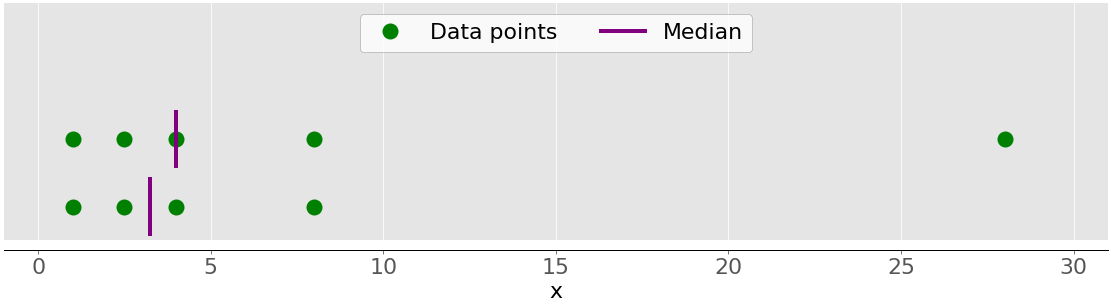
Τα σημεία δεδομένων είναι οι πράσινες κουκκίδες και οι μωβ γραμμές δείχνουν τη διάμεσο για κάθε σύνολο δεδομένων. Η διάμεση τιμή για το ανώτερο σύνολο δεδομένων (1, 2,5, 4, 8 και 28) είναι 4. Εάν αφαιρέσετε το άκρο 28 από το χαμηλότερο σύνολο δεδομένων, τότε η διάμεσος γίνεται ο αριθμητικός μέσος όρος μεταξύ 2,5 και 4, που είναι 3,25.

Το παρακάτω σχήμα δείχνει τόσο τον μέσο όρο όσο και τη διάμεσο των σημείων δεδομένων 1, 2.5, 4, 8 και 28:
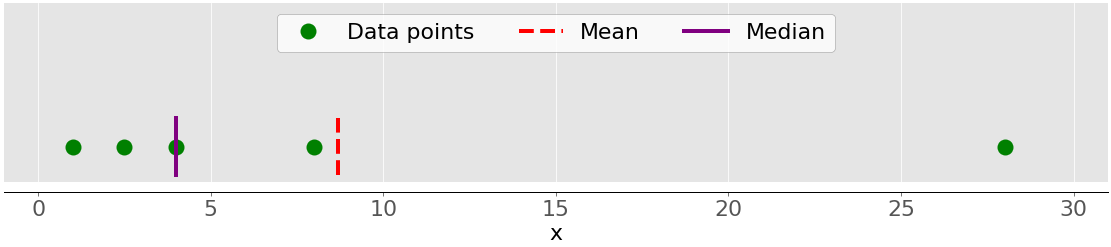
Και πάλι, ο μέσος όρος είναι η κόκκινη διακεκομμένη γραμμή, ενώ ο διάμεσος είναι η μωβ γραμμή.

Η κύρια διαφορά μεταξύ της συμπεριφοράς του μέσου όρου και της διάμεσης τιμής σχετίζεται με ακραίες τιμές ή ακραίες τιμές δεδομένων . Ο μέσος όρος επηρεάζεται σε μεγάλο βαθμό από ακραίες τιμές, αλλά η διάμεσος εξαρτάται μόνο από ακραίες τιμές είτε ελαφρώς είτε καθόλου. Σκεφτείτε το ακόλουθο σχήμα:
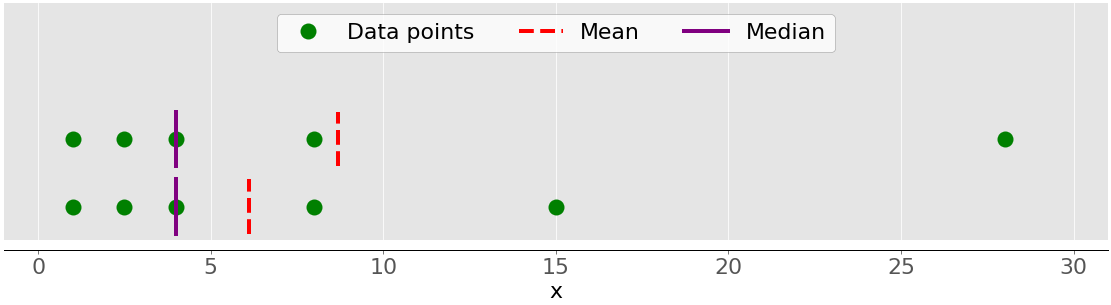
Το ανώτερο σύνολο δεδομένων έχει και πάλι τα στοιχεία 1, 2,5, 4, 8 και 28. Ο μέσος όρος του είναι 8,7 και ο διάμεσος είναι 5, όπως είδατε νωρίτερα. Το χαμηλότερο σύνολο δεδομένων δείχνει τι συμβαίνει όταν μετακινείτε το δεξιότερο σημείο με την τιμή 28:

Εάν αυξήσετε την τιμή του (μετακινήστε το προς τα δεξιά) , τότε ο μέσος όρος θα αυξηθεί, αλλά η διάμεση τιμή δεν θα αλλάξει ποτέ.
Εάν μειώσετε την τιμή του (μετακινήστε το προς τα αριστερά) , τότε ο μέσος όρος θα πέσει, αλλά η διάμεσος θα παραμείνει ίδια έως ότου η τιμή του κινούμενου σημείου είναι μεγαλύτερη ή ίση με 4.
Μπορείτε να συγκρίνετε τη μέση και τη διάμεσο ως ένας τρόπος για να ανιχνεύσετε ακραίες τιμές και ασυμμετρία στα δεδομένα σας. Το εάν η μέση τιμή ή η διάμεση τιμή είναι πιο χρήσιμη για εσάς εξαρτάται από το πλαίσιο του συγκεκριμένου προβλήματός σας.

Εδώ είναι μία από τις πολλές πιθανές καθαρές υλοποιήσεις Python της διάμεσης:

In [26]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

Δύο πιο σημαντικά βήματα αυτής της υλοποίησης είναι τα εξής:

1.   Ταξινόμηση των στοιχείων του συνόλου δεδομένων
2.   Εύρεση των μεσαίων στοιχείων στο ταξινομημένο σύνολο δεδομένων

Μπορείτε να λάβετε τη διάμεσο με statistics.median():

In [27]:
median_ = statistics.median(x)
median_

median_ = statistics.median(x[:-1])
median_

3.25

Η ταξινομημένη έκδοση του xείναι [1, 2.5, 4, 8.0, 28.0], οπότε το στοιχείο στη μέση είναι 4. Η ταξινομημένη έκδοση του x[:-1], η οποία είναι xχωρίς το τελευταίο στοιχείο 28.0, είναι [1, 2.5, 4, 8.0]. Τώρα, υπάρχουν δύο μεσαία στοιχεία 2.5και 4. Ο μέσος όρος τους είναι 3.25.

median_low()και είναι δύο ακόμη συναρτήσεις που σχετίζονται με τη διάμεσο στη βιβλιοθήκη median_high()της Python . statisticsΕπιστρέφουν πάντα ένα στοιχείο από το σύνολο δεδομένων:

1.   Εάν ο αριθμός των στοιχείων είναι περιττός , τότε υπάρχει μια ενιαία μεσαία τιμή, επομένως αυτές οι συναρτήσεις συμπεριφέρονται ακριβώς όπως median().
2.   Εάν ο αριθμός των στοιχείων είναι άρτιος , τότε υπάρχουν δύο μεσαίες τιμές. Σε αυτήν την περίπτωση, median_low() επιστρέφει την χαμηλότερη και median_high() την υψηλότερη μεσαία τιμή.

Μπορείτε να χρησιμοποιήσετε αυτές τις λειτουργίες όπως ακριβώς θα χρησιμοποιούσατε median():

In [28]:
statistics.median_low(x[:-1])

statistics.median_high(x[:-1])

4

Και πάλι, η ταξινομημένη έκδοση του x[:-1]είναι [1, 2.5, 4, 8.0]. Τα δύο στοιχεία στη μέση είναι 2.5 (χαμηλό) και 4 (υψηλό).

Σε αντίθεση με τις περισσότερες άλλες συναρτήσεις από τη statistics βιβλιοθήκη Python, median(), median_low(), και median_high() δεν επιστρέφουν nanόταν υπάρχουν nanτιμές μεταξύ των σημείων δεδομένων:

In [29]:
statistics.median(x_with_nan)

statistics.median_low(x_with_nan)

statistics.median_high(x_with_nan)

8.0

Προσοχή σε αυτή τη συμπεριφορά γιατί μπορεί να μην είναι αυτό που θέλετε!

Μπορείτε επίσης να λάβετε τη διάμεσο με np.median():

In [30]:
median_ = np.median(y)
median_

median_ = np.median(y[:-1])
median_

3.25

Έχετε λάβει τις ίδιες τιμές με statistics.median() και np.median().

Ωστόσο, εάν υπάρχει μια nanτιμή στο σύνολο δεδομένων σας, τότε np.median()εκδίδει το RuntimeWarning και επιστρέφει nan. Εάν αυτή η συμπεριφορά δεν είναι αυτή που θέλετε, τότε μπορείτε να χρησιμοποιήσετε nanmedian() για να αγνοήσετε όλες τις nan τιμές:

In [31]:
np.nanmedian(y_with_nan)

np.nanmedian(y_with_nan[:-1])

3.25

Τα ληφθέντα αποτελέσματα είναι τα ίδια με statistics.median() και np.median()εφαρμόζονται στα σύνολα δεδομένων x και y.

Τα αντικείμενα Pandas Series έχουν τη μέθοδο .median() που αγνοεί τις nan τιμές από προεπιλογή:

In [32]:
z.median()

z_with_nan.median()

4.0

Η συμπεριφορά του .median() είναι συνεπής με .mean() τα Pandas. Μπορείτε να αλλάξετε αυτήν τη συμπεριφορά με την προαιρετική παράμετρο skipna.

# **Επικρατούσα τιμή**
Η επικρατούσα τιμή είναι η τιμή στο σύνολο δεδομένων που εμφανίζεται πιο συχνά. Εάν δεν υπάρχει ούτε μία τέτοια τιμή, τότε το σύνολο είναι πολυτροπικό αφού έχει πολλαπλές επικρατούσες τιμές. Για παράδειγμα, στο σύνολο που περιέχει τα σημεία 2, 3, 2, 8 και 12, ο αριθμός 2 είναι η επικρατούσα τιμή επειδή εμφανίζεται δύο φορές, σε αντίθεση με τα άλλα στοιχεία που εμφανίζονται μόνο μία φορά.

Έτσι μπορείτε να αποκτήσετε την επικρατούσα τιμή με καθαρή Python:

In [33]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

Χρησιμοποιείτε u.count() για να λάβετε τον αριθμό των εμφανίσεων κάθε στοιχείου στο u. Το στοιχείο με τον μέγιστο αριθμό εμφανίσεων είναι η λειτουργία. Σημειώστε ότι δεν χρειάζεται να χρησιμοποιήσετε set(u). Αντίθετα, μπορείτε να το αντικαταστήσετε με απλώς uκαι να επαναλάβετε ολόκληρη τη λίστα.
**Σημείωση:** επιστρέφει ένα σύνολο set(u) Python με όλα τα μοναδικά στοιχεία. Μπορείτε να χρησιμοποιήσετε αυτό το τέχνασμα για να βελτιστοποιήσετε την εργασία με μεγαλύτερα δεδομένα, ειδικά όταν περιμένετε να δείτε πολλά διπλότυπα.

Μπορείτε να αποκτήσετε τη λειτουργία με statistics.mode() και statistics.multimode():

In [34]:
mode_ = statistics.mode(u)
mode_
mode_ = statistics.multimode(u)
mode_

[2]

Όπως μπορείτε να δείτε, mode()επέστρεψε μια μεμονωμένη τιμή, ενώ multimode() επέστρεψε η λίστα που περιέχει το αποτέλεσμα. Ωστόσο, αυτή δεν είναι η μόνη διαφορά μεταξύ των δύο λειτουργιών. Εάν υπάρχουν περισσότερες από μία τροπικές τιμές, τότε mode() αυξάνει το StatisticsError, ενώ multimode() επιστρέφει τη λίστα με όλες τις λειτουργίες:

In [35]:
v = [12, 15, 12, 15, 21, 15, 12]
statistics.mode(v)  # Raises StatisticsError
statistics.multimode(v)

[12, 15]

Θα πρέπει να δώσετε ιδιαίτερη προσοχή σε αυτό το σενάριο και να είστε προσεκτικοί όταν επιλέγετε μεταξύ αυτών των δύο λειτουργιών.

statistics.mode() και statistics.multimode() να χειριστεί τις nan τιμές ως κανονικές τιμές και μπορεί να επιστρέψει nan ως η επικρατούσα τιμή:

In [36]:
statistics.mode([2, math.nan, 2])

statistics.multimode([2, math.nan, 2])

statistics.mode([2, math.nan, 0, math.nan, 5])

statistics.multimode([2, math.nan, 0, math.nan, 5])

[nan]

Στο πρώτο παράδειγμα παραπάνω, ο αριθμός 2 εμφανίζεται δύο φορές και είναι η επικρατούσα τιμή. Στο δεύτερο παράδειγμα, nan είναι η επικρατούσα τιμή αφού εμφανίζεται δύο φορές, ενώ οι άλλες τιμές εμφανίζονται μόνο μία φορά.

**Σημείωση:** statistics.multimode() εισάγεται στην Python 3.8 .

Μπορείτε επίσης να λάβετε τη λειτουργία με scipy.stats.mode():

In [37]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_

mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

Αυτή η συνάρτηση επιστρέφει το αντικείμενο με την τιμή και τον αριθμό των φορών που εμφανίζεται. Εάν υπάρχουν πολλές τροπικές τιμές στο σύνολο δεδομένων, τότε επιστρέφεται μόνο η μικρότερη τιμή.

Μπορείτε να λάβετε τη λειτουργία και τον αριθμό των εμφανίσεών της ως πίνακες NumPy με σημειογραφία:

In [38]:
mode_.mode

mode_.count

array([3])

Αυτός ο κώδικας χρησιμοποιείται .modeγια να επιστρέψει τη μικρότερη λειτουργία ( 12) στον πίνακα vκαι .countγια να επιστρέψει τον αριθμό των φορών που εμφανίζεται ( 3). scipy.stats.mode()είναι επίσης ευέλικτο με nanαξίες. Σας επιτρέπει να ορίσετε την επιθυμητή συμπεριφορά με την προαιρετική παράμετρο nan_policy. Αυτή η παράμετρος μπορεί να λάβει τις τιμές 'propagate', 'raise'(ένα σφάλμα) ή 'omit'.

Τα αντικείμενα Pandas Series έχουν τη μέθοδο .mode() που χειρίζεται καλά τις επικρατούσες τιμές και αγνοεί τις nan τιμές από προεπιλογή:

In [40]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
u.mode()

v.mode()

w.mode()

0    2.0
dtype: float64

Όπως μπορείτε να δείτε, .mode() επιστρέφει ένα νέο pd.Seriesπου περιέχει όλες τις τιμές τρόπων. Εάν θέλετε .mode() να λάβετε nan υπόψη τιμές, τότε απλώς περάστε το προαιρετικό όρισμα dropna=False.

# **Μέτρα Μεταβλητότητας**
Οι μετρήσεις της κεντρικής τάσης δεν επαρκούν για να περιγράψουν δεδομένα. Θα χρειαστείτε επίσης τα μέτρα μεταβλητότητας που ποσοτικοποιούν την εξάπλωση των σημείων δεδομένων. Σε αυτήν την ενότητα, θα μάθετε πώς να προσδιορίζετε και να υπολογίζετε τα ακόλουθα μέτρα μεταβλητότητας:

Variance
Standard deviation
Skewness
Percentiles
Ranges

Variance
Η διακύμανση του δείγματος ποσοτικοποιεί την εξάπλωση των δεδομένων. Δείχνει αριθμητικά πόσο μακριά είναι τα σημεία δεδομένων από τη μέση τιμή. Μπορείτε να εκφράσετε τη διακύμανση του δείγματος του συνόλου δεδομένων 𝑥 με στοιχεία 𝑛 μαθηματικά ως 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), όπου 𝑖 = 1, 2, …, 𝑛 και η μέση είναι(𝑥) το δείγμα μέσου όρου του 𝑥. Αν θέλετε να καταλάβετε βαθύτερα γιατί διαιρείτε το άθροισμα με 𝑛 − 1 αντί για 𝑛, τότε μπορείτε να βουτήξετε βαθύτερα στη διόρθωση του Bessel .

Το παρακάτω σχήμα δείχνει γιατί είναι σημαντικό να λαμβάνεται υπόψη η διακύμανση κατά την περιγραφή συνόλων δεδομένων:
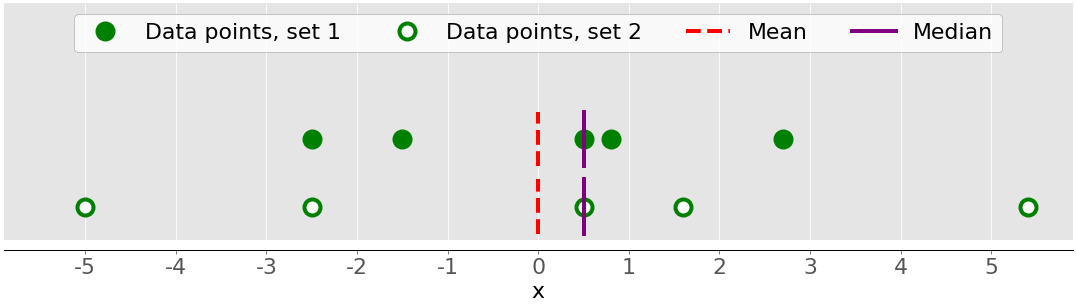
Υπάρχουν δύο σύνολα δεδομένων σε αυτό το σχήμα:

--Πράσινες κουκκίδες: Αυτό το σύνολο δεδομένων έχει μικρότερη διακύμανση ή μικρότερη μέση διαφορά από τον μέσο όρο. Έχει επίσης μικρότερο εύρος ή μικρότερη διαφορά μεταξύ του μεγαλύτερου και του μικρότερου στοιχείου.
--Λευκές κουκκίδες: Αυτό το σύνολο δεδομένων έχει μεγαλύτερη απόκλιση ή μεγαλύτερη μέση διαφορά από το μέσο όρο. Έχει επίσης μεγαλύτερη εμβέλεια ή μεγαλύτερη διαφορά μεταξύ του μεγαλύτερου και του μικρότερου στοιχείου.

Σημειώστε ότι αυτά τα δύο σύνολα δεδομένων έχουν τον ίδιο μέσο όρο και διάμεσο, παρόλο που φαίνεται να διαφέρουν σημαντικά. Ούτε ο μέσος όρος ούτε ο διάμεσος μπορούν να περιγράψουν αυτή τη διαφορά. Γι' αυτό χρειάζεστε τα μέτρα μεταβλητότητας.

Δείτε πώς μπορείτε να υπολογίσετε τη διακύμανση του δείγματος με καθαρή Python:

In [41]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

Αυτή η προσέγγιση είναι επαρκής και υπολογίζει καλά τη διακύμανση του δείγματος. Ωστόσο, η συντομότερη και πιο κομψή λύση είναι να καλέσετε την υπάρχουσα συνάρτηση statistics.variance():

In [42]:
var_ = statistics.variance(x)
var_

123.2

Έχετε το ίδιο αποτέλεσμα για τη διακύμανση όπως παραπάνω. variance() μπορεί να αποφύγει τον υπολογισμό του μέσου όρου εάν παρέχετε ρητά τον μέσο όρο ως δεύτερο όρισμα: statistics.variance(x, mean_).

Εάν έχετε nanτιμές μεταξύ των δεδομένων σας, τότε statistics.variance() θα επιστρέψετε nan:

In [43]:
statistics.variance(x_with_nan)

nan

Αυτή η συμπεριφορά είναι συνεπής και με mean() τις περισσότερες άλλες συναρτήσεις από τη statistics βιβλιοθήκη Python.

Μπορείτε επίσης να υπολογίσετε τη διακύμανση του δείγματος με το NumPy. Θα πρέπει να χρησιμοποιήσετε τη συνάρτηση np.var() ή την αντίστοιχη μέθοδο .var():

In [44]:
var_ = np.var(y, ddof=1)
var_

var_ = y.var(ddof=1)
var_

123.19999999999999

Είναι πολύ σημαντικό να καθορίσετε την παράμετρο ddof=1. Έτσι ορίζετε τους βαθμούς δέλτα ελευθερίας σε 1. Αυτή η παράμετρος επιτρέπει τον σωστό υπολογισμό του 𝑠², με (𝑛 − 1) στον παρονομαστή αντί για 𝑛.

Εάν έχετε nan τιμές στο σύνολο δεδομένων, τότε np.var() και .var() θα επιστρέψει nan:

In [45]:
np.var(y_with_nan, ddof=1)

y_with_nan.var(ddof=1)

nan

Αυτό συνάδει με np.mean() και np.average(). Εάν θέλετε να παραλείψετε nan τιμές, τότε θα πρέπει να χρησιμοποιήσετε np.nanvar():

In [46]:
np.nanvar(y_with_nan, ddof=1)

123.19999999999999

np.nanvar() αγνοεί τις nan αξίες. Χρειάζεται επίσης να προσδιορίσετε ddof=1.

pd.Series Τα αντικείμενα έχουν τη μέθοδο .var() που παραλείπει nan τις τιμές από προεπιλογή:

In [47]:
z.var(ddof=1)

z_with_nan.var(ddof=1)

123.19999999999999

Έχει επίσης την παράμετρο ddof, αλλά η προεπιλεγμένη τιμή του είναι 1, οπότε μπορείτε να την παραλείψετε. Εάν θέλετε μια διαφορετική συμπεριφορά που σχετίζεται με nanτιμές, χρησιμοποιήστε την προαιρετική παράμετρο skipna.

Υπολογίζετε τη διακύμανση του πληθυσμού παρόμοια με τη διακύμανση του δείγματος. Ωστόσο, πρέπει να χρησιμοποιήσετε το 𝑛 στον παρονομαστή αντί για το 𝑛 − 1: Σᵢ(𝑥ᵢ − mean(𝑥))² / 𝑛. Σε αυτήν την περίπτωση, 𝑛 είναι ο αριθμός των στοιχείων σε ολόκληρο τον πληθυσμό. Μπορείτε να λάβετε τη διακύμανση πληθυσμού παρόμοια με τη διακύμανση του δείγματος, με τις ακόλουθες διαφορές:

Αντικατάσταση (n - 1) με nστην καθαρή υλοποίηση Python.
Χρησιμοποιήστε statistics.pvariance() αντί για statistics.variance().
Καθορίστε την παράμετρο ddof=0εάν χρησιμοποιείτε NumPy ή Panda. Στο NumPy, μπορείτε να παραλείψετε ddof επειδή η προεπιλεγμένη τιμή του είναι 0.
Σημειώστε ότι πρέπει πάντα να γνωρίζετε εάν εργάζεστε με ένα δείγμα ή με ολόκληρο τον πληθυσμό όποτε υπολογίζετε τη διακύμανση!

# **Τυπική απόκλιση**
Η τυπική απόκλιση του δείγματος είναι ένα άλλο μέτρο της διασποράς δεδομένων. Συνδέεται με τη διακύμανση του δείγματος, καθώς η τυπική απόκλιση, 𝑠, είναι η θετική τετραγωνική ρίζα της διακύμανσης του δείγματος. Η τυπική απόκλιση είναι συχνά πιο βολική από τη διακύμανση επειδή έχει την ίδια μονάδα με τα σημεία δεδομένων. Μόλις λάβετε τη διακύμανση, μπορείτε να υπολογίσετε την τυπική απόκλιση με καθαρή Python:

In [48]:
std_ = var_ ** 0.5
std_

11.099549540409285

Αν και αυτή η λύση λειτουργεί, μπορείτε επίσης να χρησιμοποιήσετε statistics.stdev():

In [49]:
std_ = statistics.stdev(x)
std_

11.099549540409287

Φυσικά το αποτέλεσμα είναι το ίδιο με πριν. Όπως variance(), stdev() το , δεν υπολογίζει τη μέση τιμή εάν το παρέχετε ρητά ως το δεύτερο όρισμα: statistics.stdev(x, mean_).

Μπορείτε να λάβετε την τυπική απόκλιση με το NumPy σχεδόν με τον ίδιο τρόπο. Μπορείτε να χρησιμοποιήσετε τη συνάρτηση std() και την αντίστοιχη μέθοδο .std() για να υπολογίσετε την τυπική απόκλιση. Εάν υπάρχουν nanτιμές στο σύνολο δεδομένων, τότε θα επιστρέψουν nan. Για να αγνοήσετε nanτις τιμές, θα πρέπει να χρησιμοποιήσετε np.nanstd(). Χρησιμοποιείτε std(), .std(), και nanstd() από το NumPy όπως θα χρησιμοποιούσατε var(), .var()και nanvar():

In [50]:
np.std(y, ddof=1)

y.std(ddof=1)

np.std(y_with_nan, ddof=1)

y_with_nan.std(ddof=1)

np.nanstd(y_with_nan, ddof=1)

11.099549540409285

Μην ξεχάσετε να ορίσετε τους δέλτα βαθμούς ελευθερίας σε 1!

pd.Series Τα αντικείμενα έχουν επίσης τη μέθοδο .std() που παρακάμπτει nan από προεπιλογή:

In [51]:
z.std(ddof=1)

z_with_nan.std(ddof=1)

11.099549540409285

Η παράμετρος ddofείναι προεπιλεγμένη σε 1, ώστε να μπορείτε να την παραλείψετε. Και πάλι, εάν θέλετε να αντιμετωπίζετε nanτις τιμές διαφορετικά, εφαρμόστε την παράμετρο skipna.

Η τυπική απόκλιση πληθυσμού αναφέρεται σε ολόκληρο τον πληθυσμό. Είναι η θετική τετραγωνική ρίζα της διακύμανσης του πληθυσμού. Μπορείτε να το υπολογίσετε ακριβώς όπως το δείγμα τυπικής απόκλισης, με τις ακόλουθες διαφορές:

Βρείτε την τετραγωνική ρίζα της διακύμανσης του πληθυσμού στην καθαρή υλοποίηση Python.
Χρησιμοποιήστε statistics.pstdev() αντί για statistics.stdev().
Καθορίστε την παράμετρο ddof=0εάν χρησιμοποιείτε NumPy ή Panda. Στο NumPy, μπορείτε να παραλείψετε ddofεπειδή η προεπιλεγμένη τιμή του είναι 0.
Όπως μπορείτε να δείτε, μπορείτε να προσδιορίσετε την τυπική απόκλιση στα Python, NumPy και Pandas σχεδόν με τον ίδιο τρόπο που προσδιορίζετε τη διακύμανση. Χρησιμοποιείτε διαφορετικές αλλά ανάλογες συναρτήσεις και μεθόδους με τα ίδια ορίσματα.

# **Ασυμμετρία**
Η Ασυμμετρία (λοξότητα) του δείγματος μετρά την ασυμμετρία ενός δείγματος δεδομένων.
Υπάρχουν αρκετοί μαθηματικοί ορισμοί της Ασυμμετρίας. Μια κοινή έκφραση για τον υπολογισμό της του συνόλου δεδομένων 𝑥 με στοιχεία 𝑛 είναι (𝑛² / ((𝑛 − 1)(𝑛 − 2))) (Σᵢ(𝑥ᵢ − mean(𝑥))³ / (𝑛𝑠³)). Μια απλούστερη έκφραση είναι Σᵢ(𝑥ᵢ − mean(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³), όπου 𝑖 = 1, 2, …, 𝑛 και mean(𝑥) είναι το δείγμα 𝑥. Η Ασυμμετρία που ορίζεται έτσι ονομάζεται προσαρμοσμένος τυποποιημένος συντελεστής ροπής Fisher-Pearson.

Το προηγούμενο σχήμα έδειξε δύο σύνολα δεδομένων που ήταν αρκετά συμμετρικά. Με άλλα λόγια, τα σημεία τους είχαν παρόμοιες αποστάσεις από τον μέσο όρο. Αντίθετα, η ακόλουθη εικόνα απεικονίζει δύο ασύμμετρα σύνολα:
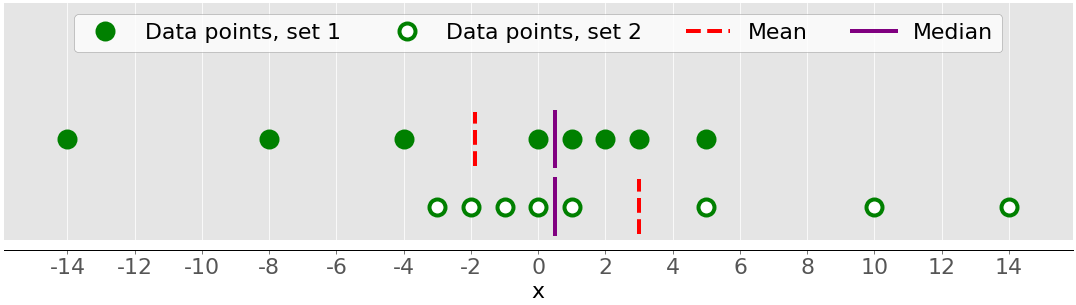
Το πρώτο σετ αντιπροσωπεύεται από τις πράσινες κουκκίδες και το δεύτερο με τις λευκές. Συνήθως, οι αρνητικές τιμές λοξότητας υποδεικνύουν ότι υπάρχει μια κυρίαρχη ουρά στην αριστερή πλευρά, την οποία μπορείτε να δείτε με το πρώτο σετ. Οι θετικές τιμές λοξότητας αντιστοιχούν σε μια μακρύτερη ή πιο παχιά ουρά στη δεξιά πλευρά, την οποία μπορείτε να δείτε στο δεύτερο σετ. Εάν η λοξότητα είναι κοντά στο 0 (για παράδειγμα, μεταξύ −0,5 και 0,5), τότε το σύνολο δεδομένων θεωρείται αρκετά συμμετρικό.

Αφού υπολογίσετε το μέγεθος του συνόλου δεδομένων σας n, τη μέση τιμή του δείγματος mean_και την τυπική απόκλιση std_, μπορείτε να λάβετε τη λοξότητα του δείγματος με καθαρή Python:

In [52]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x)
         * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.9470432273905929

Η λοξότητα είναι θετική, έτσι xέχει και μια δεξιά ουρά.

Μπορείτε επίσης να υπολογίσετε τη λοξότητα του δείγματος με scipy.stats.skew():

In [53]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

scipy.stats.skew(y_with_nan, bias=False)

nan

Το αποτέλεσμα που προκύπτει είναι το ίδιο με την καθαρή υλοποίηση Python. Η παράμετρος biasέχει οριστεί για Falseνα ενεργοποιηθούν οι διορθώσεις για στατιστική μεροληψία. Η προαιρετική παράμετρος nan_policyμπορεί να λάβει τις τιμές 'propagate', 'raise'ή 'omit'. Σας επιτρέπει να ελέγχετε πώς θα χειρίζεστε τις nanτιμές.

Τα αντικείμενα Pandas Seriesέχουν τη μέθοδο .skew()που επιστρέφει επίσης τη λοξότητα ενός συνόλου δεδομένων:

In [54]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

z_with_nan.skew()

1.9470432273905924

Όπως και άλλες μέθοδοι, .skew() αγνοεί τις nan τιμές από προεπιλογή, λόγω της προεπιλεγμένης τιμής της προαιρετικής παραμέτρου skipna.

# **Εκατοστημόριο**
Το δείγμα 𝑝 εκατοστημόριο είναι το στοιχείο στο σύνολο δεδομένων έτσι ώστε το 𝑝% των στοιχείων στο σύνολο δεδομένων είναι μικρότερο ή ίσο με αυτήν την τιμή. Επίσης, το (100 − 𝑝)% των στοιχείων είναι μεγαλύτερο ή ίσο με αυτήν την τιμή. Εάν υπάρχουν δύο τέτοια στοιχεία στο σύνολο δεδομένων, τότε το δείγμα 𝑝 εκατοστημόριο είναι ο αριθμητικός μέσος όρος τους. Κάθε σύνολο δεδομένων έχει τρία τεταρτημόρια , τα οποία είναι τα εκατοστημόρια που χωρίζουν το σύνολο δεδομένων σε τέσσερα μέρη:

Το πρώτο τεταρτημόριο είναι το δείγμα 25ο εκατοστημόριο. Διαχωρίζει περίπου το 25% των μικρότερων στοιχείων από το υπόλοιπο σύνολο δεδομένων.
Το δεύτερο τεταρτημόριο είναι το δείγμα 50ο εκατοστημόριο ή η διάμεσος . Περίπου το 25% των στοιχείων βρίσκεται μεταξύ του πρώτου και του δεύτερου τεταρτημορίου και ένα άλλο 25% μεταξύ του δεύτερου και του τρίτου τεταρτημορίου.
Το τρίτο τεταρτημόριο είναι το δείγμα 75ο εκατοστημόριο. Διαχωρίζει περίπου το 25% των μεγαλύτερων στοιχείων από το υπόλοιπο σύνολο δεδομένων.
Κάθε μέρος έχει περίπου τον ίδιο αριθμό αντικειμένων. Εάν θέλετε να διαιρέσετε τα δεδομένα σας σε πολλά διαστήματα, τότε μπορείτε να χρησιμοποιήσετε statistics.quantiles():

In [55]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

Σε αυτό το παράδειγμα, 8.0είναι η διάμεσος του x, ενώ 0.1 και 21.0 είναι το δείγμα 25ης και 75ης εκατοστιαίας θέσης, αντίστοιχα. Η παράμετρος nορίζει τον αριθμό των εκατοστημόνων ίσων πιθανοτήτων που προκύπτουν και method καθορίζει τον τρόπο υπολογισμού τους.

Σημείωση: statistics.quantiles() εισάγεται στην Python 3.8 .

Μπορείτε επίσης να το χρησιμοποιήσετε np.percentile() για να προσδιορίσετε οποιοδήποτε εκατοστημόριο δείγματος στο σύνολο δεδομένων σας. Για παράδειγμα, έτσι μπορείτε να βρείτε την 5η και την 95η εκατοστιαία θέση:

In [56]:
y = np.array(x)
np.percentile(y, 5)

np.percentile(y, 95)

34.919999999999995

percentile() παίρνει πολλά επιχειρήματα. Πρέπει να παρέχετε το σύνολο δεδομένων ως πρώτο όρισμα και την τιμή εκατοστημόριου ως δεύτερο. Το σύνολο δεδομένων μπορεί να έχει τη μορφή πίνακα NumPy, λίστας, πλειάδας ή παρόμοιας δομής δεδομένων. Το εκατοστημόριο μπορεί να είναι ένας αριθμός μεταξύ 0 και 100 όπως στο παραπάνω παράδειγμα, αλλά μπορεί επίσης να είναι μια ακολουθία αριθμών:

In [57]:
np.percentile(y, [25, 50, 75])

np.median(y)

8.0

Αυτός ο κωδικός υπολογίζει το 25ο, το 50ο και το 75ο εκατοστημόριο ταυτόχρονα. Εάν η τιμή εκατοστημόριου είναι μια ακολουθία, τότε percentile() επιστρέφει έναν πίνακα NumPy με τα αποτελέσματα. Η πρώτη πρόταση επιστρέφει τη διάταξη των τεταρτημορίων. Η δεύτερη πρόταση επιστρέφει τη διάμεσο, ώστε να μπορείτε να επιβεβαιώσετε ότι είναι ίσο με το 50ο εκατοστημόριο, που είναι 8.0.

Εάν θέλετε να αγνοήσετε nan τιμές, χρησιμοποιήστε np.nanpercentile() αντ' αυτού:

In [58]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

Έτσι μπορείς να αποφύγεις nan τις αξίες.

Το NumPy σας προσφέρει επίσης πολύ παρόμοια λειτουργικότητα σε quantile() και nanquantile(). Εάν τα χρησιμοποιείτε, τότε θα πρέπει να παρέχετε τις τιμές των ποσοστών ως αριθμούς μεταξύ 0 και 1 αντί για εκατοστημόρια:

In [59]:
np.quantile(y, 0.05)

np.quantile(y, 0.95)

np.quantile(y, [0.25, 0.5, 0.75])

np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

Τα αποτελέσματα είναι τα ίδια με τα προηγούμενα παραδείγματα, αλλά εδώ τα ορίσματά σας είναι μεταξύ 0 και 1. Με άλλα λόγια, περάσατε 0.05 αντί για 5 και 0.95 αντί για 95.

pd.Seriesτα αντικείμενα έχουν τη μέθοδο .quantile():

In [60]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

z.quantile(0.95)

z.quantile([0.25, 0.5, 0.75])

z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

.quantile() Επίσης χρειάζεται να παρέχετε την τιμή ποσοτικού ως όρισμα. Αυτή η τιμή μπορεί να είναι ένας αριθμός μεταξύ 0 και 1 ή μια ακολουθία αριθμών. Στην πρώτη περίπτωση, .quantile() επιστρέφει ένα βαθμωτό. Στη δεύτερη περίπτωση, επιστρέφει ένα νέο Series κρατώντας τα αποτελέσματα.

# **Εύρος**
Το εύρος δεδομένων είναι η διαφορά μεταξύ του μέγιστου και του ελάχιστου στοιχείου στο σύνολο δεδομένων. Μπορείτε να το αποκτήσετε με τη λειτουργία np.ptp():

In [61]:
np.ptp(y)

np.ptp(z)

np.ptp(y_with_nan)

np.ptp(z_with_nan)

nan

Αυτή η συνάρτηση επιστρέφει nanεάν υπάρχουν nanτιμές στον πίνακα NumPy. Εάν χρησιμοποιείτε ένα Seriesαντικείμενο Pandas, τότε θα επιστρέψει έναν αριθμό.

Εναλλακτικά, μπορείτε να χρησιμοποιήσετε ενσωματωμένες συναρτήσεις και μεθόδους Python, NumPy ή Pandas για να υπολογίσετε τα μέγιστα και τα ελάχιστα των ακολουθιών:

max()και min()από την τυπική βιβλιοθήκη Python
amax()και amin()από το NumPy
nanmax()και nanmin()από το NumPy για να αγνοήσει nanτις τιμές
.max()και .min()από το NumPy
.max()και .min()από το Pandas να αγνοήσει nanτις τιμές από προεπιλογή
Ακολουθούν μερικά παραδείγματα για το πώς θα χρησιμοποιούσατε αυτές τις ρουτίνες:

In [63]:
np.amax(y) - np.amin(y)

np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

y.max() - y.min()

z.max() - z.min()

z_with_nan.max() - z_with_nan.min()

46.0

Έτσι λαμβάνετε το εύρος των δεδομένων.

Το διατεταρτημόριο είναι η διαφορά μεταξύ του πρώτου και του τρίτου τεταρτημορίου. Αφού υπολογίσετε τα τεταρτημόρια, μπορείτε να πάρετε τη διαφορά τους:

In [64]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]


20.9

Σημειώστε ότι έχετε πρόσβαση στις τιμές σε ένα αντικείμενο Pandas Series με τις ετικέτες 0.75 και 0.25.

# **Περίληψη Περιγραφικής Στατιστικής**
Το SciPy και το Pandas προσφέρουν χρήσιμες ρουτίνες για γρήγορη λήψη περιγραφικών στατιστικών στοιχείων με μία κλήση συνάρτησης ή μεθόδου. Μπορείτε να χρησιμοποιήσετε το scipy.stats.describe() ως εξής:

In [65]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

Πρέπει να παρέχετε το σύνολο δεδομένων ως πρώτο όρισμα. Το όρισμα μπορεί να είναι ένας πίνακας NumPy, λίστα, πλειάδα ή παρόμοια δομή δεδομένων. Μπορείτε να παραλείψετε ddof=1, καθώς είναι η προεπιλογή και έχει σημασία μόνο όταν υπολογίζετε τη διακύμανση. Μπορείτε να περάσετε bias=False στην αναγκαστική διόρθωση της λοξότητας και της κύρτωσης για στατιστική προκατάληψη.

Σημείωση: Η προαιρετική παράμετρος nan_policy μπορεί να λάβει τις τιμές 'propagate'(προεπιλογή), 'raise'(ένα σφάλμα) ή 'omit'. Αυτή η παράμετρος σάς επιτρέπει να ελέγχετε τι συμβαίνει όταν υπάρχουν nan τιμές.

describe() επιστρέφει ένα αντικείμενο που περιέχει τα ακόλουθα περιγραφικά στατιστικά στοιχεία:

nobs: ο αριθμός των παρατηρήσεων ή των στοιχείων στο σύνολο δεδομένων σας
minmax: η πλειάδα με τις ελάχιστες και μέγιστες τιμές του συνόλου δεδομένων σας
mean: ο μέσος όρος του συνόλου δεδομένων σας
variance: η διακύμανση του συνόλου δεδομένων σας
skewness: η λοξότητα του συνόλου δεδομένων σας
kurtosis: η κύρτωση του συνόλου δεδομένων σας

Μπορείτε να αποκτήσετε πρόσβαση σε συγκεκριμένες τιμές με σημειογραφία κουκκίδων:

In [66]:
result.nobs

result.minmax[0]  # Min

result.minmax[1]  # Max

result.mean

result.variance

result.skewness

result.kurtosis

0.14770623629658886

Με το SciPy, είστε μόνο μία κλήση λειτουργίας μακριά από μια περιγραφική περίληψη στατιστικών στοιχείων για το σύνολο δεδομένων σας.

Το Pandas έχει παρόμοια, αν όχι καλύτερη, λειτουργικότητα. Series τα αντικείμενα έχουν τη μέθοδο .describe():

In [68]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

Επιστρέφει ένα νέο Series που περιέχει τα εξής:

count: ο αριθμός των στοιχείων στο σύνολο δεδομένων σας
mean: ο μέσος όρος του συνόλου δεδομένων σας
std: η τυπική απόκλιση του συνόλου δεδομένων σας
minκαι max: τις ελάχιστες και μέγιστες τιμές του συνόλου δεδομένων σας
25%, 50%, και 75%: τα τεταρτημόρια του συνόλου δεδομένων σας
Εάν θέλετε το Seriesαντικείμενο που προκύπτει να περιέχει άλλα εκατοστημόρια, τότε θα πρέπει να καθορίσετε την τιμή της προαιρετικής παραμέτρου percentiles. Μπορείτε να αποκτήσετε πρόσβαση σε κάθε στοιχείο resultμε την ετικέτα του:

In [69]:
result['mean']

result['std']

result['min']

result['max']

result['25%']

result['50%']

result['75%']

21.0

Με αυτόν τον τρόπο μπορείτε να λάβετε περιγραφικά στατιστικά στοιχεία ενός Series αντικειμένου με μία κλήση μεθόδου χρησιμοποιώντας Pandas.

# **Μέτρα συσχέτισης μεταξύ ζευγών δεδομένων**
Συχνά θα χρειαστεί να εξετάσετε τη σχέση μεταξύ των αντίστοιχων στοιχείων δύο μεταβλητών σε ένα σύνολο δεδομένων. Ας πούμε ότι υπάρχουν δύο μεταβλητές, 𝑥 και 𝑦, με ίσο αριθμό στοιχείων, 𝑛. Έστω 𝑥₁ από 𝑥 αντιστοιχεί σε 𝑦₁ από 𝑦, 𝑥₂ από 𝑥 σε 𝑦₂ από 𝑦 και ούτω καθεξής. Στη συνέχεια, μπορείτε να πείτε ότι υπάρχουν 𝑛 ζεύγη αντίστοιχων στοιχείων: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂) και ούτω καθεξής.

Θα δείτε τα ακόλουθα μέτρα συσχέτισης μεταξύ ζευγών δεδομένων:

1.   Θετική συσχέτιση υπάρχει όταν μεγαλύτερες τιμές του 𝑥 αντιστοιχούν σε μεγαλύτερες τιμές του 𝑦 και αντίστροφα.
2.   Αρνητική συσχέτιση υπάρχει όταν μεγαλύτερες τιμές του 𝑥 αντιστοιχούν σε μικρότερες τιμές του 𝑦 και αντίστροφα.
3.   Αδύναμη ή καθόλου συσχέτιση υπάρχει εάν δεν υπάρχει τέτοια φαινομενική σχέση.

Το παρακάτω σχήμα δείχνει παραδείγματα αρνητικής, ασθενούς και θετικής συσχέτισης:
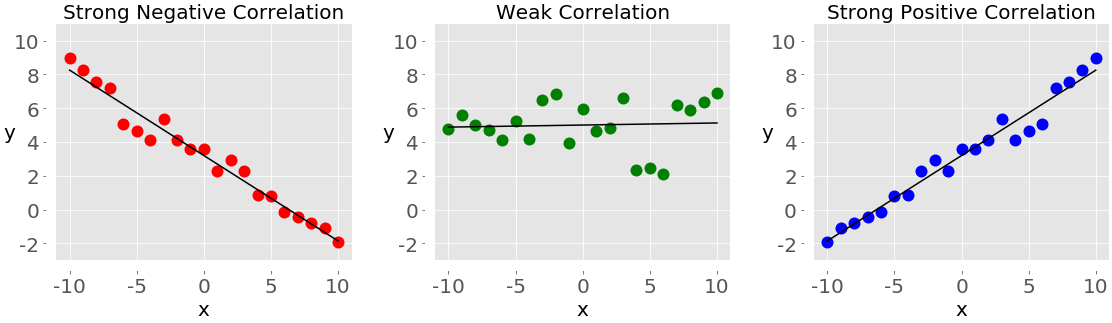
Η γραφική παράσταση στα αριστερά με τις κόκκινες κουκκίδες δείχνει αρνητική συσχέτιση. Η γραφική παράσταση στη μέση με τις πράσινες κουκκίδες δείχνει ασθενή συσχέτιση. Τέλος, η γραφική παράσταση στα δεξιά με τις μπλε τελείες δείχνει θετική συσχέτιση.

**Σημείωση:** Υπάρχει ένα σημαντικό πράγμα που πρέπει να έχετε πάντα υπόψη όταν εργάζεστε με συσχέτιση μεταξύ ενός ζεύγους μεταβλητών, και αυτό είναι ότι η συσχέτιση δεν είναι μέτρο ή δείκτης αιτιώδους συνάφειας, αλλά μόνο συσχέτισης!

Τα δύο στατιστικά στοιχεία που μετρούν τη συσχέτιση μεταξύ των συνόλων δεδομένων είναι η συνδιακύμανση και ο συντελεστής συσχέτισης. Ας ορίσουμε ορισμένα δεδομένα για να δουλέψουμε με αυτά τα μέτρα. Θα δημιουργήσετε δύο λίστες Python και θα τις χρησιμοποιήσετε για να λάβετε αντίστοιχους πίνακες NumPy και Panda Series:

In [70]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

Τώρα που έχετε τις δύο μεταβλητές, μπορείτε να ξεκινήσετε την εξερεύνηση της σχέσης μεταξύ τους.

# **Συνδιακύμανση**
Η συνδιακύμανση του δείγματος είναι ένα μέτρο που ποσοτικοποιεί την ισχύ και την κατεύθυνση μιας σχέσης μεταξύ ενός ζεύγους μεταβλητών:

Εάν η συσχέτιση είναι θετική, τότε και η συνδιακύμανση είναι θετική. Μια ισχυρότερη σχέση αντιστοιχεί σε υψηλότερη τιμή της συνδιακύμανσης.
Αν η συσχέτιση είναι αρνητική, τότε και η συνδιακύμανση είναι αρνητική. Μια ισχυρότερη σχέση αντιστοιχεί σε χαμηλότερη (ή υψηλότερη απόλυτη ) τιμή της συνδιακύμανσης.
Εάν η συσχέτιση είναι ασθενής, τότε η συνδιακύμανση είναι κοντά στο μηδέν.
Η συνδιακύμανση των μεταβλητών 𝑥 και 𝑦 ορίζεται μαθηματικά ως 𝑠ˣʸ = Σᵢ (𝑥ᵢ − mean(𝑥)) (𝑦ᵢ − mean(𝑦)) / (𝑛 − 1), όπου … me,1,  Το (𝑥) είναι ο μέσος όρος του δείγματος του 𝑥 και ο μέσος όρος(𝑦) είναι ο μέσος όρος του δείγματος του 𝑦. Συνεπάγεται ότι η συνδιακύμανση δύο όμοιων μεταβλητών είναι στην πραγματικότητα η διακύμανση: 𝑠ˣˣ = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1) = (𝑠ˣ)² και 𝑠ʸʸ = Σᵢ() / (𝑛 − 1) = (𝑠ʸ)².

Έτσι μπορείτε να υπολογίσετε τη συνδιακύμανση σε καθαρή Python:

In [71]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
          / (n - 1))
cov_xy

19.95

Πρώτα, πρέπει να βρείτε τη μέση τιμή xκαι y. Στη συνέχεια, εφαρμόζετε τον μαθηματικό τύπο για τη συνδιακύμανση.

Το NumPy έχει τη συνάρτηση cov()που επιστρέφει τον πίνακα συνδιακύμανσης:

In [72]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

Σημειώστε ότι cov()έχει τις προαιρετικές παραμέτρους bias, οι οποίες είναι προεπιλεγμένες False και ddof, οι οποίες είναι προεπιλεγμένες None. Οι προεπιλεγμένες τιμές τους είναι κατάλληλες για τη λήψη του δείγματος πίνακα συνδιακύμανσης. Το επάνω αριστερό στοιχείο του πίνακα συνδιακύμανσης είναι η συνδιακύμανση του x και x ή η διακύμανση του x. Ομοίως, το στοιχείο κάτω δεξιά είναι η συνδιακύμανση του yκαι yή η διακύμανση του y. Μπορείτε να ελέγξετε για να δείτε ότι αυτό είναι αλήθεια:

In [73]:
x_.var(ddof=1)

y_.var(ddof=1)

13.914285714285711

Όπως μπορείτε να δείτε, οι διακυμάνσεις των xκαι yείναι ίσες με cov_matrix[0, 0]και cov_matrix[1, 1], αντίστοιχα.

Τα άλλα δύο στοιχεία του πίνακα συνδιακύμανσης είναι ίσα και αντιπροσωπεύουν την πραγματική συνδιακύμανση μεταξύ  και y:

In [74]:
cov_xy = cov_matrix[0, 1]
cov_xy

cov_xy = cov_matrix[1, 0]
cov_xy

19.95

Λάβατε την ίδια τιμή της συνδιακύμανσης με np.cov() την καθαρή Python.

Τα πάντα Series έχουν τη μέθοδο .cov() που μπορείτε να χρησιμοποιήσετε για να υπολογίσετε τη συνδιακύμανση:

In [75]:
cov_xy = x__.cov(y__)
cov_xy

cov_xy = y__.cov(x__)
cov_xy

19.95

Εδώ, καλείτε .cov() ένα Series αντικείμενο και περνάτε το άλλο αντικείμενο ως πρώτο όρισμα.

# **Συντελεστής συσχέτισης**
Ο συντελεστής συσχέτισης ή ο συντελεστής συσχέτισης προϊόντος-στιγμής Pearson , συμβολίζεται με το σύμβολο 𝑟. Ο συντελεστής είναι ένα άλλο μέτρο της συσχέτισης μεταξύ των δεδομένων. Μπορείτε να το σκεφτείτε ως μια τυποποιημένη συνδιακύμανση. Ακολουθούν μερικά σημαντικά στοιχεία σχετικά με αυτό:

1.   Η τιμή 𝑟 > 0 υποδηλώνει θετική συσχέτιση.
1.   Η τιμή 𝑟 < 0 υποδηλώνει αρνητική συσχέτιση.
2.   Η τιμή r = 1 είναι η μέγιστη δυνατή τιμή του 𝑟. Αντιστοιχεί σε μια τέλεια θετική γραμμική σχέση μεταξύ των μεταβλητών.
2.   Η τιμή r = −1 είναι η ελάχιστη δυνατή τιμή του 𝑟. Αντιστοιχεί σε μια τέλεια αρνητική γραμμική σχέση μεταξύ των μεταβλητών.
1.   Η τιμή r ≈ 0 , ή όταν το 𝑟 είναι γύρω στο μηδέν, σημαίνει ότι η συσχέτιση μεταξύ των μεταβλητών είναι ασθενής.

Ο μαθηματικός τύπος για τον συντελεστή συσχέτισης είναι 𝑟 = 𝑠ˣʸ / (𝑠ˣ𝑠ʸ) όπου 𝑠ˣ και 𝑠ʸ είναι οι τυπικές αποκλίσεις των 𝑥 και 𝑦 αντίστοιχα. Εάν έχετε τον μέσο όρο (mean_xκαι mean_y) και τις τυπικές αποκλίσεις (std_x, std_y) για τα σύνολα δεδομένων xκαι y, καθώς και τη συνδιακύμανσή τους cov_xy, τότε μπορείτε να υπολογίσετε τον συντελεστή συσχέτισης με την καθαρή Python:

In [76]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

Έχετε τη μεταβλητή rπου αντιπροσωπεύει τον συντελεστή συσχέτισης.

scipy.stats έχει τη ρουτίνα pearsonr() που υπολογίζει τον συντελεστή συσχέτισης και την τιμή 𝑝:

In [77]:
r, p = scipy.stats.pearsonr(x_, y_)
r

p

5.122760847201135e-07

pearsonr() επιστρέφει μια πλειάδα με δύο αριθμούς. Το πρώτο είναι 𝑟 και το δεύτερο είναι το 𝑝-τιμή.

Παρόμοια με την περίπτωση του πίνακα συνδιακύμανσης, μπορείτε να εφαρμόσετε np.corrcoef() με x_ και y_ ως ορίσματα και να πάρετε τον πίνακα συντελεστών συσχέτισης:

In [78]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

Το επάνω αριστερό στοιχείο είναι ο συντελεστής συσχέτισης μεταξύ x_ και x_. Το στοιχείο κάτω δεξιά είναι ο συντελεστής συσχέτισης μεταξύ y_ και y_. Οι τιμές τους είναι ίσες με 1.0. Τα άλλα δύο στοιχεία είναι ίσα και αντιπροσωπεύουν τον πραγματικό συντελεστή συσχέτισης μεταξύ x_ και y_:

In [79]:
r = corr_matrix[0, 1]
r

r = corr_matrix[1, 0]
r


0.861950005631606

Φυσικά, το αποτέλεσμα είναι το ίδιο με το καθαρό Python και το pearsonr().

Μπορείτε να πάρετε τον συντελεστή συσχέτισης με scipy.stats.linregress():

In [80]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

linregress() παίρνει x_ και y_, εκτελεί γραμμική παλινδρόμηση και επιστρέφει τα αποτελέσματα. slope και intercept ορίστε την εξίσωση της γραμμής παλινδρόμησης, ενώ rvalue είναι ο συντελεστής συσχέτισης. Για να αποκτήσετε πρόσβαση σε συγκεκριμένες τιμές από το αποτέλεσμα του linregress(), συμπεριλαμβανομένου του συντελεστή συσχέτισης, χρησιμοποιήστε σημειογραφία με τελείες:

In [81]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

Έτσι μπορείτε να εκτελέσετε γραμμική παλινδρόμηση και να αποκτήσετε τον συντελεστή συσχέτισης.

Τα πάντα Series έχουν τη μέθοδο .corr() για τον υπολογισμό του συντελεστή συσχέτισης:

In [82]:
r = x__.corr(y__)
r

r = y__.corr(x__)
r

0.861950005631606

Θα πρέπει να καλέσετε .corr() ένα Series αντικείμενο και να περάσετε το άλλο αντικείμενο ως πρώτο όρισμα.

# **Εργασία με δεδομένα 2D**
Οι στατιστικολόγοι συχνά εργάζονται με δεδομένα 2D. Ακολουθούν μερικά παραδείγματα μορφών δεδομένων 2D:

Πίνακες βάσεων δεδομένων

1.   Αρχεία CSV
2.   Πίνακες βάσεων δεδομένων
2.   Υπολογιστικά φύλλα Excel, Calc και Google

Το NumPy και το SciPy παρέχουν ένα ολοκληρωμένο μέσο για εργασία με δεδομένα 2D. Το Pandas έχει την κατηγορία DataFrameειδικά για να χειρίζεται δεδομένα με ετικέτα 2D

# **Axes**
Ξεκινήστε δημιουργώντας έναν πίνακα 2D NumPy:

In [83]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

Τώρα έχετε ένα δισδιάστατο σύνολο δεδομένων, το οποίο θα χρησιμοποιήσετε σε αυτήν την ενότητα. Μπορείτε να εφαρμόσετε συναρτήσεις και μεθόδους στατιστικής Python σε αυτό όπως θα κάνατε σε δεδομένα 1D:

In [84]:
np.mean(a)

a.mean()

np.median(a)

a.var(ddof=1)

53.40000000000001

Όπως μπορείτε να δείτε, λαμβάνετε στατιστικά στοιχεία (όπως ο μέσος όρος, η διάμεσος ή η διακύμανση) σε όλα τα δεδομένα στον πίνακα a. Μερικές φορές, αυτή η συμπεριφορά είναι αυτό που θέλετε, αλλά σε ορισμένες περιπτώσεις, θα θέλετε αυτές οι ποσότητες να υπολογίζονται για κάθε γραμμή ή στήλη του πίνακα 2D.

Οι λειτουργίες και οι μέθοδοι που έχετε χρησιμοποιήσει μέχρι στιγμής έχουν μια προαιρετική παράμετρο που ονομάζεται axis, η οποία είναι απαραίτητη για το χειρισμό δισδιάστατων δεδομένων. axisμπορεί να λάβει οποιαδήποτε από τις ακόλουθες τιμές:

1.   axis=None λέει να υπολογίσει τα στατιστικά στοιχεία για όλα τα δεδομένα του πίνακα. Τα παραπάνω παραδείγματα λειτουργούν έτσι. Αυτή η συμπεριφορά είναι συχνά η προεπιλογή στο NumPy.
2.   axis=0 λέει να υπολογίσει τα στατιστικά στοιχεία σε όλες τις σειρές, δηλαδή για κάθε στήλη του πίνακα. Αυτή η συμπεριφορά είναι συχνά η προεπιλογή για τις στατιστικές συναρτήσεις SciPy.
2.   axis=1 λέει να υπολογίσει τα στατιστικά στοιχεία σε όλες τις στήλες, δηλαδή για κάθε γραμμή του πίνακα.

Ας δούμε axis=0 σε δράση με np.mean():

In [85]:
np.mean(a, axis=0)

a.mean(axis=0)

array([6.2, 8.2, 1.8])

Οι δύο παραπάνω δηλώσεις επιστρέφουν νέους πίνακες NumPy με τον μέσο όρο για κάθε στήλη του a. Σε αυτό το παράδειγμα, ο μέσος όρος της πρώτης στήλης είναι 6.2. Η δεύτερη στήλη έχει το μέσο όρο 8.2, ενώ η τρίτη έχει 1.8.

Εάν παρέχετε axis=1 σε mean(), τότε θα λάβετε τα αποτελέσματα για κάθε σειρά:

In [86]:
np.mean(a, axis=1)

a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

Όπως μπορείτε να δείτε, η πρώτη σειρά a έχει τη μέση τιμή 1.0, η δεύτερη 2.0 και ούτω καθεξής.

**Σημείωση:** Μπορείτε να επεκτείνετε αυτούς τους κανόνες σε πολυδιάστατους πίνακες, αλλά αυτό ξεφεύγει από το πεδίο αυτού του σεμιναρίου. Μη διστάσετε να βουτήξετε μόνοι σας σε αυτό το θέμα!

Η παράμετρος axis λειτουργεί με τον ίδιο τρόπο με άλλες συναρτήσεις και μεθόδους NumPy:

In [87]:
np.median(a, axis=0)

np.median(a, axis=1)

a.var(axis=0, ddof=1)

a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

Έχετε τις διάμεσους και τις παραλλαγές δειγμάτων για όλες τις στήλες (axis=0) και τις γραμμές (axis=1) του πίνακα a.

Αυτό είναι πολύ παρόμοιο όταν εργάζεστε με συναρτήσεις στατιστικών στοιχείων SciPy. Αλλά να θυμάστε ότι σε αυτήν την περίπτωση, η προεπιλεγμένη τιμή για axis είναι 0:

In [88]:
scipy.stats.gmean(a)  # Default: axis=0

scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

Εάν παραλείψετε axisή παρέχετε axis=0, τότε θα λάβετε το αποτέλεσμα σε όλες τις σειρές, δηλαδή για κάθε στήλη. Για παράδειγμα, η πρώτη στήλη του a έχει γεωμετρικό μέσο όρο 4.0, και ούτω καθεξής.

Εάν καθορίσετε axis=1, τότε θα λάβετε τους υπολογισμούς σε όλες τις στήλες, δηλαδή για κάθε σειρά:

In [89]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

Σε αυτό το παράδειγμα, ο γεωμετρικός μέσος όρος της πρώτης σειράς a είναι 1.0. Για τη δεύτερη σειρά, είναι περίπου 1.82, και ούτω καθεξής.

Εάν θέλετε στατιστικά στοιχεία για ολόκληρο το σύνολο δεδομένων, τότε πρέπει να δώσετε axis=None:

In [90]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

Ο γεωμετρικός μέσος όρος όλων των στοιχείων του πίνακα a είναι περίπου 2.83.

Μπορείτε να λάβετε μια σύνοψη στατιστικών στοιχείων Python με μία κλήση συνάρτησης για δεδομένα 2D με το scipy.stats.describe(). Λειτουργεί παρόμοια με τους πίνακες 1D, αλλά πρέπει να είστε προσεκτικοί με την παράμετρο axis:

In [91]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

scipy.stats.describe(a, ddof=1, bias=False)  # Default: axis=0

scipy.stats.describe(a, axis=1, ddof=1, bias=False)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

Όταν παρέχετε axis=None, λαμβάνετε τη σύνοψη σε όλα τα δεδομένα. Τα περισσότερα αποτελέσματα είναι βαθμίδες. Εάν το ορίσετε axis=0ή το παραλείψετε, τότε η επιστρεφόμενη τιμή είναι η περίληψη για κάθε στήλη. Έτσι, τα περισσότερα αποτελέσματα είναι οι πίνακες με τον ίδιο αριθμό στοιχείων με τον αριθμό των στηλών. Εάν ορίσετε axis=1, τότε describe() επιστρέφει τη σύνοψη για όλες τις σειρές.

Μπορείτε να λάβετε μια συγκεκριμένη τιμή από τη σύνοψη με σημειογραφία κουκίδων:

In [92]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

Έτσι μπορείτε να δείτε μια σύνοψη στατιστικών στοιχείων για έναν πίνακα 2D με μία κλήση συνάρτησης.

# **DataFrames**
Η κλάση DataFrame είναι ένας από τους βασικούς τύπους δεδομένων Panda. Είναι πολύ άνετο να δουλέψεις γιατί έχει ετικέτες για σειρές και στήλες. Χρησιμοποιήστε τον πίνακα aκαι δημιουργήστε ένα DataFrame:

In [93]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


Στην πράξη, τα ονόματα των στηλών έχουν σημασία και πρέπει να είναι περιγραφικά. Τα ονόματα των σειρών μερικές φορές καθορίζονται αυτόματα ως 0, 1, και ούτω καθεξής. Μπορείτε να τα καθορίσετε ρητά με την παράμετρο index, αν και μπορείτε να τα παραλείψετε indexαν θέλετε.

DataFrame Οι μέθοδοι είναι πολύ παρόμοιες με τις Series μεθόδους, αν και η συμπεριφορά είναι διαφορετική. Εάν καλέσετε μεθόδους στατιστικής Python χωρίς ορίσματα, τότε DataFrame θα εμφανιστούν τα αποτελέσματα για κάθε στήλη:

In [94]:
df.mean()

df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

Αυτό που παίρνετε είναι ένα νέο Series που κρατά τα αποτελέσματα. Σε αυτήν την περίπτωση, η Series τιμή περιέχει τον μέσο όρο και τη διακύμανση για κάθε στήλη. Εάν θέλετε τα αποτελέσματα για κάθε σειρά, τότε απλώς καθορίστε την παράμετρο axis=1:

In [95]:
df.mean(axis=1)


df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

Το αποτέλεσμα είναι ένα Seriesμε την επιθυμητή ποσότητα για κάθε σειρά. Οι ετικέτες 'first', 'second'και ούτω καθεξής αναφέρονται στις διαφορετικές σειρές.

Μπορείτε να απομονώσετε κάθε στήλη ενός DataFrame όπως αυτό:

In [96]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int64

Τώρα, έχετε τη στήλη 'A' σε μορφή Series αντικειμένου και μπορείτε να εφαρμόσετε τις κατάλληλες μεθόδους:

In [97]:
df['A'].mean()

df['A'].var()

37.20000000000001

Με αυτόν τον τρόπο μπορείτε να αποκτήσετε τα στατιστικά στοιχεία για μία στήλη.

Μερικές φορές, μπορεί να θέλετε να χρησιμοποιήσετε έναν DataFrame ως πίνακα NumPy και να εφαρμόσετε κάποια συνάρτηση σε αυτόν. Είναι δυνατό να λάβετε όλα τα δεδομένα από ένα DataFrame με .values ή .to_numpy():

In [98]:
df.values


df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

df.valuesκαι df.to_numpy() να σας δώσει έναν πίνακα NumPy με όλα τα στοιχεία από τις DataFrame ετικέτες χωρίς γραμμή και στήλη. Σημειώστε ότι df.to_numpy() είναι πιο ευέλικτο επειδή μπορείτε να καθορίσετε τον τύπο δεδομένων των στοιχείων και εάν θέλετε να χρησιμοποιήσετε τα υπάρχοντα δεδομένα ή να τα αντιγράψετε.

Όπως Series, DataFrame τα αντικείμενα έχουν τη μέθοδο .describe() που επιστρέφει μια άλλη DataFrame με τη σύνοψη στατιστικών στοιχείων για όλες τις στήλες:

In [99]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


Η περίληψη περιέχει τα ακόλουθα αποτελέσματα:

count: ο αριθμός των στοιχείων σε κάθε στήλη
mean: ο μέσος όρος κάθε στήλης
std: η τυπική απόκλιση
minκαι max: τις ελάχιστες και μέγιστες τιμές
25%, 50%, και 75%: τα εκατοστημόρια
Εάν θέλετε το DataFrameαντικείμενο που προκύπτει να περιέχει άλλα εκατοστημόρια, τότε θα πρέπει να καθορίσετε την τιμή της προαιρετικής παραμέτρου percentiles.

Μπορείτε να αποκτήσετε πρόσβαση σε κάθε στοιχείο της περίληψης ως εξής:

In [100]:
df.describe().at['mean', 'A']

df.describe().at['50%', 'B']

3.0

Έτσι μπορείτε να λάβετε περιγραφικά στατιστικά στοιχεία Python σε ένα Series αντικείμενο με μία κλήση μεθόδου Pandas.